In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re
from collections import Counter

/Users/hiromi/.pyenv/versions/3.8.10/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df_bigtech = pd.read_csv('bigtecg_lobby_detail_2010-2021.csv')

In [3]:
df_bigtech = df_bigtech[df_bigtech.year >= 2011]

In [4]:
df_bigtech.shape

(42, 17)

### How much they spent?

In [5]:
## lobby amount to_csv
bigtech_lobby_doller = df_bigtech.iloc[:, 0:7]
bigtech_lobby_doller['sum'] = bigtech_lobby_doller.iloc[:, 2:].sum(axis=1)

In [6]:
bigtech_lobby_doller.head(3)

,season,year,amazon_lobby,facebook_lobby,google_lobby,apple_lobby,microsoft_lobby,sum
0,2021 2nd Quarter - Report,2021,4860000,4770000,2090000,1640000,2470000,15830000
1,2021 1st Quarter - Report,2021,4800000,4790000,2690000,1460000,2590000,16330000
2,2020 4th Quarter - Report,2020,4740000,4690000,2110000,1450000,2190000,15180000


In [7]:
bigtech_lobby_doller.to_csv('bigtech_lobby_doller_2011-2021.csv', index=False)

<AxesSubplot:>

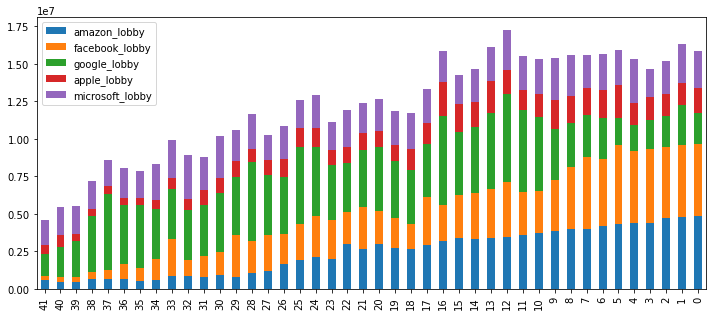

In [8]:
testplot = bigtech_lobby_doller.sort_values(axis=0,by='season', ascending=True)
testplot.iloc[:, 2:7].plot.bar(y=bigtech_lobby_doller.columns[2:7], stacked=True, figsize=(12,5) )

<AxesSubplot:>

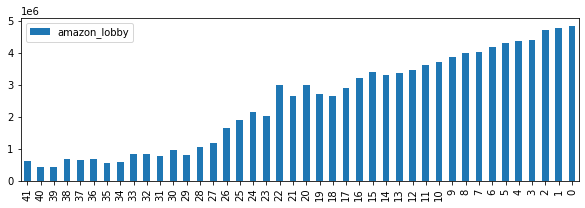

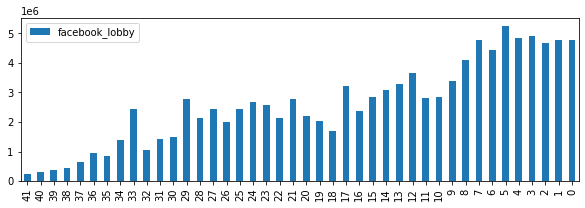

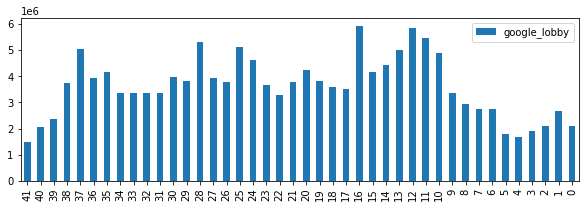

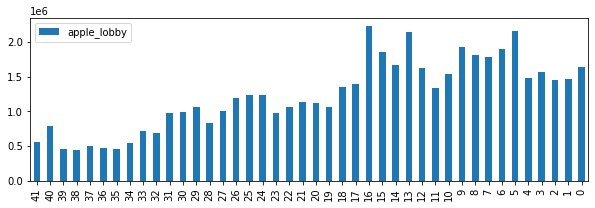

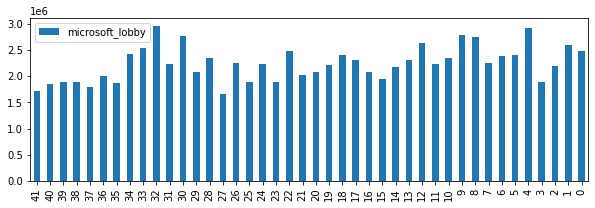

In [9]:
testplot.iloc[:, 2:3].plot.bar(y=bigtech_lobby_doller.columns[2:3], stacked=True, figsize=(10,3) )
testplot.iloc[:, 3:4].plot.bar(y=bigtech_lobby_doller.columns[3:4], stacked=True, figsize=(10,3) )
testplot.iloc[:, 4:5].plot.bar(y=bigtech_lobby_doller.columns[4:5], stacked=True, figsize=(10,3) )
testplot.iloc[:, 5:6].plot.bar(y=bigtech_lobby_doller.columns[5:6], stacked=True, figsize=(10,3) )
testplot.iloc[:, 6:7].plot.bar(y=bigtech_lobby_doller.columns[6:7], stacked=True, figsize=(10,3) )

In [10]:
# text = df_bigtech['amazon_text'][0]
# text
# re.findall(r'15. General issue area code(.*?)16\.', text)
# re.findall(r'16. Specific lobbying issues(.*?)17\.', text)

In [11]:
amazon_issue = []
for text in df_bigtech['amazon_text']:
    dict = {}
    dict['amazon_issue_code'] = re.findall(r'15. General issue area code(.*?)16\.', text)
    dict['amazon_specific_issue'] = re.findall(r'16. Specific lobbying issues(.*?)17\.', text)
    amazon_issue.append(dict)

In [12]:
df_amazon_issue = pd.DataFrame(amazon_issue)
# df_amazon_issue

In [13]:
df_bigtech = df_bigtech.join(df_amazon_issue)

In [14]:
facebook_issue = []
for text in df_bigtech['facebook_text']:
    dict = {}
    dict['facebook_issue_code'] = re.findall(r'15. General issue area code(.*?)16\.', text)
    dict['facebook_specific_issue'] = re.findall(r'16. Specific lobbying issues(.*?)17\.', text)
    facebook_issue.append(dict)

In [15]:
df_facebook_issue = pd.DataFrame(facebook_issue)
# df_facebook_issue

In [16]:
df_bigtech = df_bigtech.join(df_facebook_issue)

In [17]:
google_issue = []
for text in df_bigtech['google_text']:
    dict = {}
    dict['google_issue_code'] = re.findall(r'15. General issue area code(.*?)16\.', text)
    dict['google_specific_issue'] = re.findall(r'16. Specific lobbying issues(.*?)17\.', text)
    google_issue.append(dict)

In [18]:
df_google_issue = pd.DataFrame(google_issue)
# df_google_issue

In [19]:
df_bigtech = df_bigtech.join(df_google_issue)

In [20]:
apple_issue = []
for text in df_bigtech['apple_text']:
    dict = {}
    dict['apple_issue_code'] = re.findall(r'15. General issue area code(.*?)16\.', text)
    dict['apple_specific_issue'] = re.findall(r'16. Specific lobbying issues(.*?)17\.', text)
    apple_issue.append(dict)

In [21]:
df_apple_issue = pd.DataFrame(apple_issue)
# df_apple_issue

In [22]:
df_bigtech = df_bigtech.join(df_apple_issue)

In [23]:
microsoft_issue = []
for text in df_bigtech['microsoft_text']:
    dict = {}
    dict['microsoft_issue_code'] = re.findall(r'15. General issue area code(.*?)16\.', text)
    dict['microsoft_specific_issue'] = re.findall(r'16. Specific lobbying issues(.*?)17\.', text)
    microsoft_issue.append(dict)

In [24]:
df_microsoft_issue = pd.DataFrame(microsoft_issue)
# df_microsoft_issue

In [25]:
df_bigtech = df_bigtech.join(df_microsoft_issue)

In [26]:
## Let's keep this results for csv.
df_bigtech.to_csv('bigtech_lobby_issue_2011-2021.csv',index=False)

In [27]:
df_bigtech.head(2)

,season,year,amazon_lobby,facebook_lobby,google_lobby,apple_lobby,microsoft_lobby,amazon_link,facebook_link,google_link,...,amazon_issue_code,amazon_specific_issue,facebook_issue_code,facebook_specific_issue,google_issue_code,google_specific_issue,apple_issue_code,apple_specific_issue,microsoft_issue_code,microsoft_specific_issue
0,2021 2nd Quarter - Report,2021,4860000,4770000,2090000,1640000,2470000,https://lda.senate.gov//filings/public/filing/...,https://lda.senate.gov//filings/public/filing/...,https://lda.senate.gov//filings/public/filing/...,...,"[ TEC , CPT , TAX , CSP , HOM , POS ...","[ Issues related to broadband, satellite comm...","[ CPT , HOM , IMM , MIA , TAX , TRD ...","[ S. 936, Integrity, Notification, and Fairne...","[ ADV , CPT , CSP , EDU , FOR , HCR ...",[ Regulation of online advertising Privacy an...,"[ CPT , TAX , EDU , TEC , ENV , TRD ...",[ General patent policy Issues related to sta...,"[ CPI , CPT , CSP , EDU , IMM , SCI ...","[ Licensing, competition, trade, and governme..."
1,2021 1st Quarter - Report,2021,4800000,4790000,2690000,1460000,2590000,https://lda.senate.gov//filings/public/filing/...,https://lda.senate.gov//filings/public/filing/...,https://lda.senate.gov//filings/public/filing/...,...,"[ TEC , CPT , TAX , CSP , HOM , POS ...","[ Issues related to broadband, satellite comm...","[ CPT , HOM , IMM , MIA , TAX , TRD ...","[ S. 936, Integrity, Notification, and Fairne...","[ ADV , CPT , CSP , EDU , FOR , HCR ...",[ Regulation of online advertising Privacy an...,"[ CPT , TAX , EDU , TEC , ENV , TRD ...",[ General patent policy Issues related to sta...,"[ CPI , CPT , CSP , EDU , IMM , SCI ...","[ Licensing, competition, trade, and governme..."


In [28]:
# df_bigtech['amazon_specific_issue'][0]

In [29]:
# df_bigtech.shape

In [30]:
df_issue_code = df_bigtech[['season', 'year', 'amazon_issue_code', 'facebook_issue_code', 'google_issue_code', 'apple_issue_code', 'microsoft_issue_code']].copy()

In [31]:
# df_issue_code.shape

In [32]:
# len(df_issue_code['amazon_issue_code'][0])

In [33]:
def get_length(row):
    return len(row['amazon_issue_code'])

df_issue_code['amazon_issues'] = df_issue_code.apply(get_length, axis=1)

In [34]:
def get_length(row):
    return len(row['facebook_issue_code'])

df_issue_code['facebook_issues'] = df_issue_code.apply(get_length, axis=1)

In [35]:
def get_length(row):
    return len(row['google_issue_code'])

df_issue_code['google_issues'] = df_issue_code.apply(get_length, axis=1)

In [36]:
def get_length(row):
    return len(row['apple_issue_code'])

df_issue_code['apple_issues'] = df_issue_code.apply(get_length, axis=1)

In [37]:
def get_length(row):
    return len(row['microsoft_issue_code'])

df_issue_code['microsoft_issues'] = df_issue_code.apply(get_length, axis=1)

In [38]:
# df_issue_code

<AxesSubplot:>

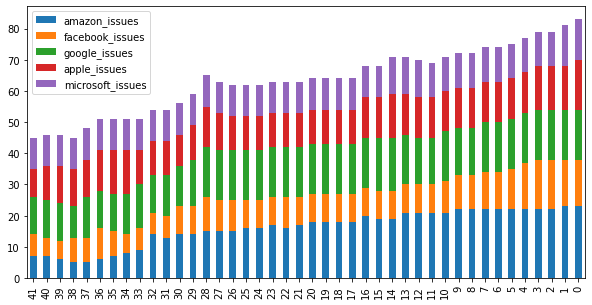

In [39]:
testplot2 = df_issue_code.sort_values(axis=0, by='season', ascending=True)
testplot2.iloc[:, -5:].plot.bar(y=df_issue_code.columns[-5:], stacked=True, figsize=(10,5) )

In [40]:
df_issue_code.to_csv('bigtech_lobby_issue_code_count_2011-2021.csv', index=False)

In [41]:
"""
memo: stripped = [s.strip() for s in my_list] 

def get_ADV(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'ADV' in stripped :
        return 1
    else:
        return 0
        
df_issue_code.apply(get_ADV, axis=1)
"""

"\nmemo: stripped = [s.strip() for s in my_list] \n\ndef get_ADV(row):\n    stripped = [s.strip() for s in row['amazon_issue_code']]\n    if 'ADV' in stripped :\n        return 1\n    else:\n        return 0\n        \ndf_issue_code.apply(get_ADV, axis=1)\n"

## Count past 10-year frequency

3 area code:
http://www.lobbycongress.com/images/Lobbying_Issue_Codes.pdf

### ①with for loop

In [42]:
"""
flat_list = [item for sublist in original_list_of_lists for item in sublist] 

is same as

for sublist in original_list_of_lists:
    for item in sublist:
        flat_list.append(item)
"""

'\nflat_list = [item for sublist in original_list_of_lists for item in sublist] \n\nis same as\n\nfor sublist in original_list_of_lists:\n    for item in sublist:\n        flat_list.append(item)\n'

In [43]:
original_list_of_lists = df_issue_code['amazon_issue_code'].to_list()
# original_list_of_lists

In [44]:
flat_list = [item for sublist in original_list_of_lists for item in sublist] 
frequency = {} 
# iterating over the list for item in random_list: 
for item in flat_list:
# checking the element in dictionary
    if item in frequency: 
        # incrementing the count
        frequency[item] += 1 
    else: 
        # initializing the count 
        frequency[item] = 1 
# printing the frequency 
print(frequency)

{' TEC  ': 42, ' CPT  ': 42, ' TAX  ': 42, ' CSP  ': 42, ' HOM  ': 42, ' POS  ': 37, ' CPI  ': 36, ' IMM  ': 33, ' TRD  ': 33, ' DEF  ': 33, ' INT  ': 33, ' AVI  ': 31, ' FIN  ': 30, ' TRA  ': 28, ' WEL  ': 26, ' SMB  ': 24, ' LBR  ': 22, ' EDU  ': 21, ' GOV  ': 17, ' BUD  ': 17, ' HCR  ': 15, ' CIV  ': 10, ' CAW  ': 2, ' MED  ': 6, ' BEV  ': 8, ' SCI  ': 3, ' BAN  ': 3}


In [45]:
pd.DataFrame.from_dict([frequency])

,TEC,CPT,TAX,CSP,HOM,POS,CPI,IMM,TRD,DEF,...,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN
0,42,42,42,42,42,37,36,33,33,33,...,21,17,17,15,10,2,6,8,3,3


### ②Count frequency with Counter

In [46]:
amazon_list_of_lists = df_issue_code['amazon_issue_code'].to_list()
#amazon_list_of_lists
flat_list = [item for sublist in amazon_list_of_lists for item in sublist] 

In [47]:
amazon_code_dict = Counter(flat_list)
# amazon_code_dict

In [48]:
amazon_code_freq = pd.DataFrame.from_dict([amazon_code_dict])

In [49]:
amazon_code_freq = amazon_code_freq.rename(index={0: 'amazon'})
amazon_code_freq

,TEC,CPT,TAX,CSP,HOM,POS,CPI,IMM,TRD,DEF,...,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN
amazon,42,42,42,42,42,37,36,33,33,33,...,21,17,17,15,10,2,6,8,3,3


In [50]:
facebook_list_of_lists = df_issue_code['facebook_issue_code'].to_list()

flat_list = [item for sublist in facebook_list_of_lists for item in sublist] 

facebook_code_dict = Counter(flat_list)

facebook_code_freq = pd.DataFrame.from_dict([facebook_code_dict])

facebook_code_freq = facebook_code_freq.rename(index={0: 'facebook'})
facebook_code_freq

,CPT,HOM,IMM,MIA,TAX,TRD,CPI,GOV,TEC,SCI,...,INT,ENV,LBR,TRA,EDU,ADV,FOR,FIN,NAT,COM
facebook,39,38,39,42,35,35,42,15,10,10,...,26,4,3,1,1,12,6,2,6,1


In [51]:
google_list_of_lists = df_issue_code['google_issue_code'].to_list()

flat_list = [item for sublist in google_list_of_lists for item in sublist] 

google_code_dict = Counter(flat_list)

google_code_freq = pd.DataFrame.from_dict([google_code_dict])

google_code_freq = google_code_freq.rename(index={0: 'google'})
google_code_freq

,ADV,CPT,CSP,EDU,FOR,HCR,HOM,IMM,LBR,SCI,SMB,TEC,TRD,LAW,TAX,TRA,ENG
google,42,42,42,30,42,31,37,41,42,41,42,42,42,16,40,27,26


In [52]:
apple_list_of_lists = df_issue_code['apple_issue_code'].to_list()

flat_list = [item for sublist in apple_list_of_lists for item in sublist] 

apple_code_dict = Counter(flat_list)

apple_code_freq = pd.DataFrame.from_dict([apple_code_dict])

apple_code_freq = apple_code_freq.rename(index={0: 'apple'})
apple_code_freq

,CPT,TAX,EDU,TEC,ENV,TRD,CSP,LAW,HCR,BAN,...,IMM,MAN,SCI,CIV,FOR,BUD,MIA,CPI,FIN,MED
apple,42,42,42,42,42,42,42,41,28,26,...,19,3,2,1,1,14,10,13,8,2


In [53]:
microsoft_list_of_lists = df_issue_code['microsoft_issue_code'].to_list()

flat_list = [item for sublist in microsoft_list_of_lists for item in sublist] 

microsoft_code_dict = Counter(flat_list)

microsoft_code_freq = pd.DataFrame.from_dict([microsoft_code_dict])

microsoft_code_freq = microsoft_code_freq.rename(index={0: 'microsoft'})
microsoft_code_freq

,CPI,CPT,CSP,EDU,IMM,SCI,TAX,TEC,TRD,ENV,LBR,DEF,TRA,TAR
microsoft,42,42,42,42,42,42,42,42,42,42,15,2,2,3


### Frequency past decades (2011-2021)

In [54]:
bigtech_freq = pd.concat([amazon_code_freq, facebook_code_freq, google_code_freq, apple_code_freq, microsoft_code_freq], join='outer')

In [55]:
bigtech_freq = bigtech_freq.T.fillna(0).astype(int)

In [56]:
bigtech_freq['sum'] = bigtech_freq.sum(axis=1)

In [57]:
bigtech_freq = bigtech_freq.sort_values(by='sum', ascending=False)

In [84]:
bigtech_freq.index = bigtech_freq.index.str.strip()
# bigtech_freq

In [82]:
code = pd.read_csv('lobby_code.csv')
code.Code = code.Code.str.strip()
code = code.set_index('Code')

In [86]:
bigtech_freq = bigtech_freq.join(code, how='left')

In [87]:
bigtech_freq.to_csv('bigtech_lobby_issue_freq_2011-2021.csv', index=True)

## Company specific
### ①Amazon

In [59]:
# df_issue_code.columns

In [60]:
df_amazon = df_issue_code[['season', 'year', 'amazon_issue_code', 'amazon_issues']]

In [61]:
# df_amazon['amazon_issue_code'][0]

In [62]:
## TEC,CPT,TAX,CSP, HOM =42 ,,, no need to make def

In [63]:
def TEC(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'TEC' in stripped :
        return 1
    else:
        return 0

def CPT(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'CPT' in stripped :
        return 1
    else:
        return 0

def TAX(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'TAX' in stripped :
        return 1
    else:
        return 0

def CSP(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'CSP' in stripped :
        return 1
    else:
        return 0

def HOM(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'HOM' in stripped :
        return 1
    else:
        return 0


def POS(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'POS' in stripped :
        return 1
    else:
        return 0

def CPI(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'CPI' in stripped :
        return 1
    else:
        return 0

def IMM(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'IMM' in stripped :
        return 1
    else:
        return 0

def TRD(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'TRD' in stripped :
        return 1
    else:
        return 0

def DEF(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'DEF' in stripped :
        return 1
    else:
        return 0

def INT(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'INT' in stripped :
        return 1
    else:
        return 0
    
def AVI(row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'AVI' in stripped :
        return 1
    else:
        return 0

def FIN (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'FIN' in stripped :
        return 1
    else:
        return 0

def TRA (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'TRA' in stripped :
        return 1
    else:
        return 0
    
def WEL (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'WEL' in stripped :
        return 1
    else:
        return 0

def SMB (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'SMB' in stripped :
        return 1
    else:
        return 0

def LBR (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'LBR' in stripped :
        return 1
    else:
        return 0
    
def EDU (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'EDU' in stripped :
        return 1
    else:
        return 0

def GOV (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'GOV' in stripped :
        return 1
    else:
        return 0

def BUD (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'BUD' in stripped :
        return 1
    else:
        return 0
    
def HCR (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'HCR' in stripped :
        return 1
    else:
        return 0

def CIV (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'CIV' in stripped :
        return 1
    else:
        return 0

def CAW (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'CAW' in stripped :
        return 1
    else:
        return 0
    
def MED (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'MED' in stripped :
        return 1
    else:
        return 0

def BEV (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'BEV' in stripped :
        return 1
    else:
        return 0

def SCI (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'SCI' in stripped :
        return 1
    else:
        return 0
    
def BAN (row):
    stripped = [s.strip() for s in row['amazon_issue_code']]
    if 'BAN' in stripped :
        return 1
    else:
        return 0
        
df_amazon_code_detail = df_amazon.apply([TEC, CPT,TAX,CSP, HOM, POS,CPI,IMM,TRD,DEF,INT,AVI,FIN,TRA,WEL,\
                 SMB,LBR,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN ], axis=1)

In [64]:
df_amazon = df_amazon.join(df_amazon_code_detail)

In [65]:
df_amazon.shape

(42, 31)

In [66]:
df_amazon.head(2)

,season,year,amazon_issue_code,amazon_issues,TEC,CPT,TAX,CSP,HOM,POS,...,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN
0,2021 2nd Quarter - Report,2021,"[ TEC , CPT , TAX , CSP , HOM , POS ...",23,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0
1,2021 1st Quarter - Report,2021,"[ TEC , CPT , TAX , CSP , HOM , POS ...",23,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,0


In [67]:
## just for checking
# print(df_amazon.iloc[ : , 4: ].sum(axis=1)) 
# print(df_amazon.amazon_issues)

<AxesSubplot:>

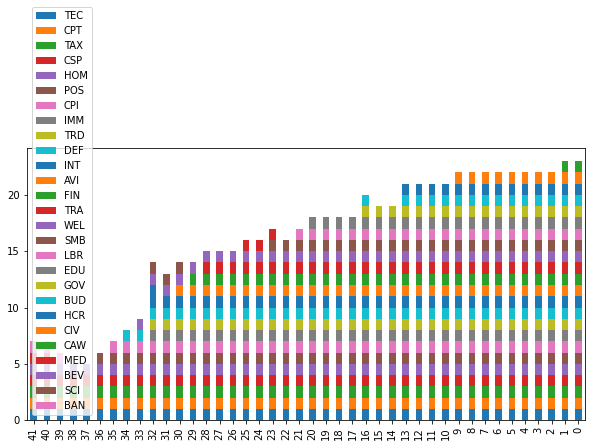

In [68]:
testplot3 = df_amazon.sort_values(axis=0, by='season', ascending=True)
testplot3.iloc[:, 4:].plot.bar(y=df_amazon.columns[4:], stacked=True, figsize=(10,5) )

In [69]:
df_amazon.to_csv('c_amazon.csv', index=False)

### ②Facebook

In [70]:
df_facebook = df_issue_code[['season', 'year', 'facebook_issue_code', 'facebook_issues']]

In [71]:
df_facebook.head(2)

,season,year,facebook_issue_code,facebook_issues
0,2021 2nd Quarter - Report,2021,"[ CPT , HOM , IMM , MIA , TAX , TRD ...",15
1,2021 1st Quarter - Report,2021,"[ CPT , HOM , IMM , MIA , TAX , TRD ...",15


In [72]:
a = 'facebook_issue_code'

def TEC(row):
    stripped = [s.strip() for s in row[a]]
    if 'TEC' in stripped :
        return 1
    else:
        return 0

def CPT(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPT' in stripped :
        return 1
    else:
        return 0

def TAX(row):
    stripped = [s.strip() for s in row[a]]
    if 'TAX' in stripped :
        return 1
    else:
        return 0

def CSP(row):
    stripped = [s.strip() for s in row[a]]
    if 'CSP' in stripped :
        return 1
    else:
        return 0

def HOM(row):
    stripped = [s.strip() for s in row[a]]
    if 'HOM' in stripped :
        return 1
    else:
        return 0


def POS(row):
    stripped = [s.strip() for s in row[a]]
    if 'POS' in stripped :
        return 1
    else:
        return 0

def CPI(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPI' in stripped :
        return 1
    else:
        return 0

def IMM(row):
    stripped = [s.strip() for s in row[a]]
    if 'IMM' in stripped :
        return 1
    else:
        return 0

def TRD(row):
    stripped = [s.strip() for s in row[a]]
    if 'TRD' in stripped :
        return 1
    else:
        return 0

def DEF(row):
    stripped = [s.strip() for s in row[a]]
    if 'DEF' in stripped :
        return 1
    else:
        return 0

def INT(row):
    stripped = [s.strip() for s in row[a]]
    if 'INT' in stripped :
        return 1
    else:
        return 0
    
def AVI(row):
    stripped = [s.strip() for s in row[a]]
    if 'AVI' in stripped :
        return 1
    else:
        return 0

def FIN (row):
    stripped = [s.strip() for s in row[a]]
    if 'FIN' in stripped :
        return 1
    else:
        return 0

def TRA (row):
    stripped = [s.strip() for s in row[a]]
    if 'TRA' in stripped :
        return 1
    else:
        return 0
    
def WEL (row):
    stripped = [s.strip() for s in row[a]]
    if 'WEL' in stripped :
        return 1
    else:
        return 0

def SMB (row):
    stripped = [s.strip() for s in row[a]]
    if 'SMB' in stripped :
        return 1
    else:
        return 0

def LBR (row):
    stripped = [s.strip() for s in row[a]]
    if 'LBR' in stripped :
        return 1
    else:
        return 0
    
def EDU (row):
    stripped = [s.strip() for s in row[a]]
    if 'EDU' in stripped :
        return 1
    else:
        return 0

def GOV (row):
    stripped = [s.strip() for s in row[a]]
    if 'GOV' in stripped :
        return 1
    else:
        return 0

def BUD (row):
    stripped = [s.strip() for s in row[a]]
    if 'BUD' in stripped :
        return 1
    else:
        return 0
    
def HCR (row):
    stripped = [s.strip() for s in row[a]]
    if 'HCR' in stripped :
        return 1
    else:
        return 0

def CIV (row):
    stripped = [s.strip() for s in row[a]]
    if 'CIV' in stripped :
        return 1
    else:
        return 0

def CAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'CAW' in stripped :
        return 1
    else:
        return 0
    
def MED (row):
    stripped = [s.strip() for s in row[a]]
    if 'MED' in stripped :
        return 1
    else:
        return 0

def BEV (row):
    stripped = [s.strip() for s in row[a]]
    if 'BEV' in stripped :
        return 1
    else:
        return 0

def SCI (row):
    stripped = [s.strip() for s in row[a]]
    if 'SCI' in stripped :
        return 1
    else:
        return 0
    
def BAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'BAN' in stripped :
        return 1
    else:
        return 0
    
def MIA (row):
    stripped = [s.strip() for s in row[a]]
    if 'MIA' in stripped :
        return 1
    else:
        return 0
    
def LAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'LAW' in stripped :
        return 1
    else:
        return 0

def DIS (row):
    stripped = [s.strip() for s in row[a]]
    if 'DIS' in stripped :
        return 1
    else:
        return 0

def ENV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENV' in stripped :
        return 1
    else:
        return 0
    
def ADV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ADV' in stripped :
        return 1
    else:
        return 0
    
def FOR (row):
    stripped = [s.strip() for s in row[a]]
    if 'FOR' in stripped :
        return 1
    else:
        return 0

def NAT (row):
    stripped = [s.strip() for s in row[a]]
    if 'NAT' in stripped :
        return 1
    else:
        return 0

def COM (row):
    stripped = [s.strip() for s in row[a]]
    if 'COM' in stripped :
        return 1
    else:
        return 0
        
df_facebook_code_detail = df_facebook.apply([TEC, CPT,TAX,CSP, HOM, POS,CPI,IMM,TRD,DEF,INT,AVI,FIN,TRA,WEL,\
                 SMB,LBR,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM, ], axis=1)

In [73]:
# df_facebook_code_detail

In [74]:
df_facebook = df_facebook.join(df_facebook_code_detail)

In [75]:
df_facebook.head(2)

,season,year,facebook_issue_code,facebook_issues,TEC,CPT,TAX,CSP,HOM,POS,...,SCI,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM
0,2021 2nd Quarter - Report,2021,"[ CPT , HOM , IMM , MIA , TAX , TRD ...",15,1,1,1,0,1,0,...,1,0,1,1,1,1,0,0,0,0
1,2021 1st Quarter - Report,2021,"[ CPT , HOM , IMM , MIA , TAX , TRD ...",15,1,1,1,0,1,0,...,1,0,1,1,1,1,0,0,0,0


<AxesSubplot:>

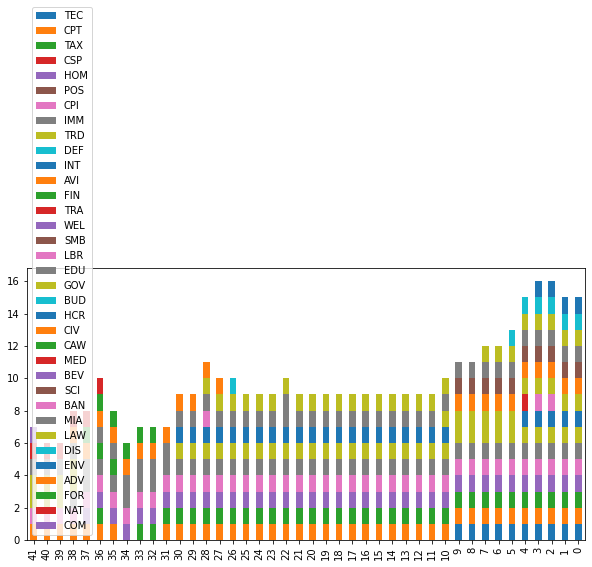

In [76]:
testplot4 = df_facebook.sort_values(axis=0, by='season', ascending=True)
testplot4.iloc[:, 4:].plot.bar(y=df_facebook.columns[4:], stacked=True, figsize=(10,5) )

In [77]:
df_facebook.to_csv('c_facebook.csv', index=False)

### ③Google

In [78]:
df_google = df_issue_code[['season', 'year', 'google_issue_code', 'google_issues']]

In [79]:
# df_google

In [80]:
a = 'google_issue_code'

def TEC(row):
    stripped = [s.strip() for s in row[a]]
    if 'TEC' in stripped :
        return 1
    else:
        return 0

def CPT(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPT' in stripped :
        return 1
    else:
        return 0

def TAX(row):
    stripped = [s.strip() for s in row[a]]
    if 'TAX' in stripped :
        return 1
    else:
        return 0

def CSP(row):
    stripped = [s.strip() for s in row[a]]
    if 'CSP' in stripped :
        return 1
    else:
        return 0

def HOM(row):
    stripped = [s.strip() for s in row[a]]
    if 'HOM' in stripped :
        return 1
    else:
        return 0


def POS(row):
    stripped = [s.strip() for s in row[a]]
    if 'POS' in stripped :
        return 1
    else:
        return 0

def CPI(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPI' in stripped :
        return 1
    else:
        return 0

def IMM(row):
    stripped = [s.strip() for s in row[a]]
    if 'IMM' in stripped :
        return 1
    else:
        return 0

def TRD(row):
    stripped = [s.strip() for s in row[a]]
    if 'TRD' in stripped :
        return 1
    else:
        return 0

def DEF(row):
    stripped = [s.strip() for s in row[a]]
    if 'DEF' in stripped :
        return 1
    else:
        return 0

def INT(row):
    stripped = [s.strip() for s in row[a]]
    if 'INT' in stripped :
        return 1
    else:
        return 0
    
def AVI(row):
    stripped = [s.strip() for s in row[a]]
    if 'AVI' in stripped :
        return 1
    else:
        return 0

def FIN (row):
    stripped = [s.strip() for s in row[a]]
    if 'FIN' in stripped :
        return 1
    else:
        return 0

def TRA (row):
    stripped = [s.strip() for s in row[a]]
    if 'TRA' in stripped :
        return 1
    else:
        return 0
    
def WEL (row):
    stripped = [s.strip() for s in row[a]]
    if 'WEL' in stripped :
        return 1
    else:
        return 0

def SMB (row):
    stripped = [s.strip() for s in row[a]]
    if 'SMB' in stripped :
        return 1
    else:
        return 0

def LBR (row):
    stripped = [s.strip() for s in row[a]]
    if 'LBR' in stripped :
        return 1
    else:
        return 0
    
def EDU (row):
    stripped = [s.strip() for s in row[a]]
    if 'EDU' in stripped :
        return 1
    else:
        return 0

def GOV (row):
    stripped = [s.strip() for s in row[a]]
    if 'GOV' in stripped :
        return 1
    else:
        return 0

def BUD (row):
    stripped = [s.strip() for s in row[a]]
    if 'BUD' in stripped :
        return 1
    else:
        return 0
    
def HCR (row):
    stripped = [s.strip() for s in row[a]]
    if 'HCR' in stripped :
        return 1
    else:
        return 0

def CIV (row):
    stripped = [s.strip() for s in row[a]]
    if 'CIV' in stripped :
        return 1
    else:
        return 0

def CAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'CAW' in stripped :
        return 1
    else:
        return 0
    
def MED (row):
    stripped = [s.strip() for s in row[a]]
    if 'MED' in stripped :
        return 1
    else:
        return 0

def BEV (row):
    stripped = [s.strip() for s in row[a]]
    if 'BEV' in stripped :
        return 1
    else:
        return 0

def SCI (row):
    stripped = [s.strip() for s in row[a]]
    if 'SCI' in stripped :
        return 1
    else:
        return 0
    
def BAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'BAN' in stripped :
        return 1
    else:
        return 0
    
def MIA (row):
    stripped = [s.strip() for s in row[a]]
    if 'MIA' in stripped :
        return 1
    else:
        return 0
    
def LAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'LAW' in stripped :
        return 1
    else:
        return 0

def DIS (row):
    stripped = [s.strip() for s in row[a]]
    if 'DIS' in stripped :
        return 1
    else:
        return 0

def ENV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENV' in stripped :
        return 1
    else:
        return 0
    
def ADV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ADV' in stripped :
        return 1
    else:
        return 0
    
def FOR (row):
    stripped = [s.strip() for s in row[a]]
    if 'FOR' in stripped :
        return 1
    else:
        return 0

def NAT (row):
    stripped = [s.strip() for s in row[a]]
    if 'NAT' in stripped :
        return 1
    else:
        return 0

def COM (row):
    stripped = [s.strip() for s in row[a]]
    if 'COM' in stripped :
        return 1
    else:
        return 0
        
def ENG (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENG' in stripped :
        return 1
    else:
        return 0
    
df_google_code_detail = df_google.apply([TEC, CPT,TAX,CSP, HOM, POS,CPI,IMM,TRD,DEF,INT,AVI,FIN,TRA,WEL,\
                 SMB,LBR,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM,ENG ], axis=1)

In [81]:
# df_google_code_detail.sum()

In [82]:
df_google = df_google.join(df_google_code_detail)

In [83]:
df_google.head(2)

,season,year,google_issue_code,google_issues,TEC,CPT,TAX,CSP,HOM,POS,...,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM,ENG
0,2021 2nd Quarter - Report,2021,"[ ADV , CPT , CSP , EDU , FOR , HCR ...",16,1,1,1,1,1,0,...,0,0,1,0,0,1,1,0,0,0
1,2021 1st Quarter - Report,2021,"[ ADV , CPT , CSP , EDU , FOR , HCR ...",16,1,1,1,1,1,0,...,0,0,1,0,0,1,1,0,0,0


<AxesSubplot:>

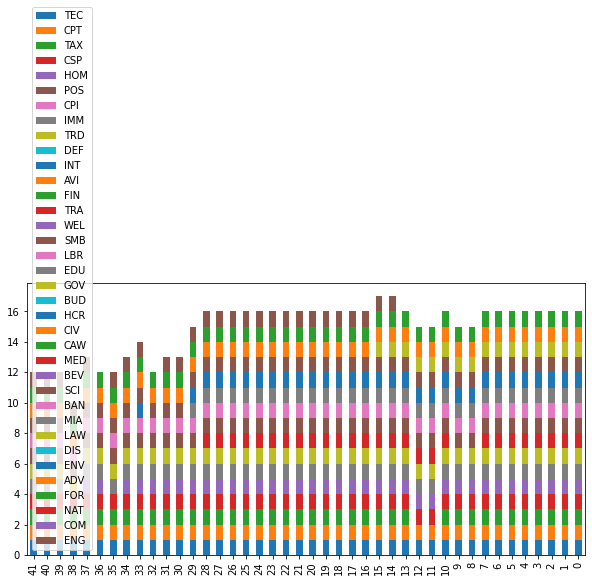

In [84]:
testplot5 = df_google.sort_values(axis=0, by='season', ascending=True)
testplot5.iloc[:, 4:].plot.bar(y=df_google.columns[4:], stacked=True, figsize=(10,5) )

In [85]:
df_google.to_csv('c_google.csv', index=False)

### ④Apple

In [86]:
df_apple = df_issue_code[['season', 'year', 'apple_issue_code', 'apple_issues']]

In [87]:
a = 'apple_issue_code'

def TEC(row):
    stripped = [s.strip() for s in row[a]]
    if 'TEC' in stripped :
        return 1
    else:
        return 0

def CPT(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPT' in stripped :
        return 1
    else:
        return 0

def TAX(row):
    stripped = [s.strip() for s in row[a]]
    if 'TAX' in stripped :
        return 1
    else:
        return 0

def CSP(row):
    stripped = [s.strip() for s in row[a]]
    if 'CSP' in stripped :
        return 1
    else:
        return 0

def HOM(row):
    stripped = [s.strip() for s in row[a]]
    if 'HOM' in stripped :
        return 1
    else:
        return 0


def POS(row):
    stripped = [s.strip() for s in row[a]]
    if 'POS' in stripped :
        return 1
    else:
        return 0

def CPI(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPI' in stripped :
        return 1
    else:
        return 0

def IMM(row):
    stripped = [s.strip() for s in row[a]]
    if 'IMM' in stripped :
        return 1
    else:
        return 0

def TRD(row):
    stripped = [s.strip() for s in row[a]]
    if 'TRD' in stripped :
        return 1
    else:
        return 0

def DEF(row):
    stripped = [s.strip() for s in row[a]]
    if 'DEF' in stripped :
        return 1
    else:
        return 0

def INT(row):
    stripped = [s.strip() for s in row[a]]
    if 'INT' in stripped :
        return 1
    else:
        return 0
    
def AVI(row):
    stripped = [s.strip() for s in row[a]]
    if 'AVI' in stripped :
        return 1
    else:
        return 0

def FIN (row):
    stripped = [s.strip() for s in row[a]]
    if 'FIN' in stripped :
        return 1
    else:
        return 0

def TRA (row):
    stripped = [s.strip() for s in row[a]]
    if 'TRA' in stripped :
        return 1
    else:
        return 0
    
def WEL (row):
    stripped = [s.strip() for s in row[a]]
    if 'WEL' in stripped :
        return 1
    else:
        return 0

def SMB (row):
    stripped = [s.strip() for s in row[a]]
    if 'SMB' in stripped :
        return 1
    else:
        return 0

def LBR (row):
    stripped = [s.strip() for s in row[a]]
    if 'LBR' in stripped :
        return 1
    else:
        return 0
    
def EDU (row):
    stripped = [s.strip() for s in row[a]]
    if 'EDU' in stripped :
        return 1
    else:
        return 0

def GOV (row):
    stripped = [s.strip() for s in row[a]]
    if 'GOV' in stripped :
        return 1
    else:
        return 0

def BUD (row):
    stripped = [s.strip() for s in row[a]]
    if 'BUD' in stripped :
        return 1
    else:
        return 0
    
def HCR (row):
    stripped = [s.strip() for s in row[a]]
    if 'HCR' in stripped :
        return 1
    else:
        return 0

def CIV (row):
    stripped = [s.strip() for s in row[a]]
    if 'CIV' in stripped :
        return 1
    else:
        return 0

def CAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'CAW' in stripped :
        return 1
    else:
        return 0
    
def MED (row):
    stripped = [s.strip() for s in row[a]]
    if 'MED' in stripped :
        return 1
    else:
        return 0

def BEV (row):
    stripped = [s.strip() for s in row[a]]
    if 'BEV' in stripped :
        return 1
    else:
        return 0

def SCI (row):
    stripped = [s.strip() for s in row[a]]
    if 'SCI' in stripped :
        return 1
    else:
        return 0
    
def BAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'BAN' in stripped :
        return 1
    else:
        return 0
    
def MIA (row):
    stripped = [s.strip() for s in row[a]]
    if 'MIA' in stripped :
        return 1
    else:
        return 0
    
def LAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'LAW' in stripped :
        return 1
    else:
        return 0

def DIS (row):
    stripped = [s.strip() for s in row[a]]
    if 'DIS' in stripped :
        return 1
    else:
        return 0

def ENV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENV' in stripped :
        return 1
    else:
        return 0
    
def ADV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ADV' in stripped :
        return 1
    else:
        return 0
    
def FOR (row):
    stripped = [s.strip() for s in row[a]]
    if 'FOR' in stripped :
        return 1
    else:
        return 0

def NAT (row):
    stripped = [s.strip() for s in row[a]]
    if 'NAT' in stripped :
        return 1
    else:
        return 0

def COM (row):
    stripped = [s.strip() for s in row[a]]
    if 'COM' in stripped :
        return 1
    else:
        return 0
        
def ENG (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENG' in stripped :
        return 1
    else:
        return 0

def MAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'MAN' in stripped :
        return 1
    else:
        return 0
    
df_apple_code_detail = df_apple.apply([TEC, CPT,TAX,CSP, HOM, POS,CPI,IMM,TRD,DEF,INT,AVI,FIN,TRA,WEL,\
                 SMB,LBR,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM,ENG,MAN ], axis=1)

In [88]:
# df_apple_code_detail.sum()

In [89]:
df_apple = df_apple.join(df_apple_code_detail)

In [90]:
df_apple.head(2)

,season,year,apple_issue_code,apple_issues,TEC,CPT,TAX,CSP,HOM,POS,...,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM,ENG,MAN
0,2021 2nd Quarter - Report,2021,"[ CPT , TAX , EDU , TEC , ENV , TRD ...",16,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1
1,2021 1st Quarter - Report,2021,"[ CPT , TAX , EDU , TEC , ENV , TRD ...",14,1,1,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


<AxesSubplot:>

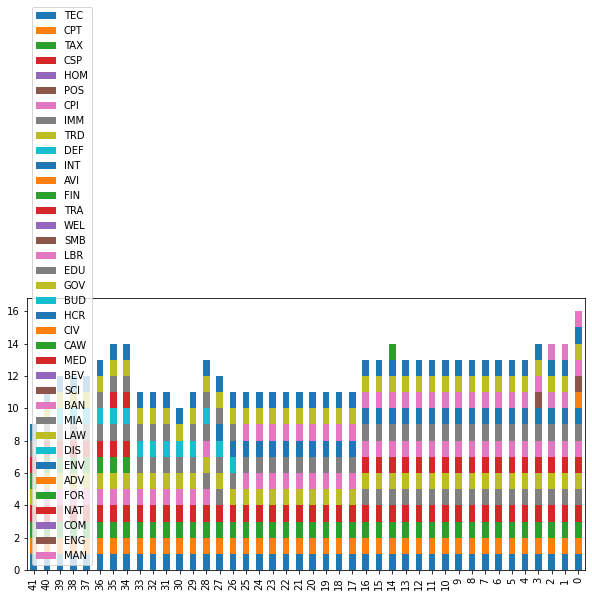

In [91]:
testplot6 = df_apple.sort_values(axis=0, by='season', ascending=True)
testplot6.iloc[:, 4:].plot.bar(y=df_apple.columns[4:], stacked=True, figsize=(10,5) )

In [92]:
df_apple.to_csv('c_apple.csv',index=False)

### ⑤Microsoft

In [93]:
df_microsoft = df_issue_code[['season', 'year', 'microsoft_issue_code', 'microsoft_issues']]

In [94]:
# df_microsoft

In [95]:
a = 'microsoft_issue_code'

def TEC(row):
    stripped = [s.strip() for s in row[a]]
    if 'TEC' in stripped :
        return 1
    else:
        return 0

def CPT(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPT' in stripped :
        return 1
    else:
        return 0

def TAX(row):
    stripped = [s.strip() for s in row[a]]
    if 'TAX' in stripped :
        return 1
    else:
        return 0

def CSP(row):
    stripped = [s.strip() for s in row[a]]
    if 'CSP' in stripped :
        return 1
    else:
        return 0

def HOM(row):
    stripped = [s.strip() for s in row[a]]
    if 'HOM' in stripped :
        return 1
    else:
        return 0


def POS(row):
    stripped = [s.strip() for s in row[a]]
    if 'POS' in stripped :
        return 1
    else:
        return 0

def CPI(row):
    stripped = [s.strip() for s in row[a]]
    if 'CPI' in stripped :
        return 1
    else:
        return 0

def IMM(row):
    stripped = [s.strip() for s in row[a]]
    if 'IMM' in stripped :
        return 1
    else:
        return 0

def TRD(row):
    stripped = [s.strip() for s in row[a]]
    if 'TRD' in stripped :
        return 1
    else:
        return 0

def DEF(row):
    stripped = [s.strip() for s in row[a]]
    if 'DEF' in stripped :
        return 1
    else:
        return 0

def INT(row):
    stripped = [s.strip() for s in row[a]]
    if 'INT' in stripped :
        return 1
    else:
        return 0
    
def AVI(row):
    stripped = [s.strip() for s in row[a]]
    if 'AVI' in stripped :
        return 1
    else:
        return 0

def FIN (row):
    stripped = [s.strip() for s in row[a]]
    if 'FIN' in stripped :
        return 1
    else:
        return 0

def TRA (row):
    stripped = [s.strip() for s in row[a]]
    if 'TRA' in stripped :
        return 1
    else:
        return 0
    
def WEL (row):
    stripped = [s.strip() for s in row[a]]
    if 'WEL' in stripped :
        return 1
    else:
        return 0

def SMB (row):
    stripped = [s.strip() for s in row[a]]
    if 'SMB' in stripped :
        return 1
    else:
        return 0

def LBR (row):
    stripped = [s.strip() for s in row[a]]
    if 'LBR' in stripped :
        return 1
    else:
        return 0
    
def EDU (row):
    stripped = [s.strip() for s in row[a]]
    if 'EDU' in stripped :
        return 1
    else:
        return 0

def GOV (row):
    stripped = [s.strip() for s in row[a]]
    if 'GOV' in stripped :
        return 1
    else:
        return 0

def BUD (row):
    stripped = [s.strip() for s in row[a]]
    if 'BUD' in stripped :
        return 1
    else:
        return 0
    
def HCR (row):
    stripped = [s.strip() for s in row[a]]
    if 'HCR' in stripped :
        return 1
    else:
        return 0

def CIV (row):
    stripped = [s.strip() for s in row[a]]
    if 'CIV' in stripped :
        return 1
    else:
        return 0

def CAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'CAW' in stripped :
        return 1
    else:
        return 0
    
def MED (row):
    stripped = [s.strip() for s in row[a]]
    if 'MED' in stripped :
        return 1
    else:
        return 0

def BEV (row):
    stripped = [s.strip() for s in row[a]]
    if 'BEV' in stripped :
        return 1
    else:
        return 0

def SCI (row):
    stripped = [s.strip() for s in row[a]]
    if 'SCI' in stripped :
        return 1
    else:
        return 0
    
def BAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'BAN' in stripped :
        return 1
    else:
        return 0
    
def MIA (row):
    stripped = [s.strip() for s in row[a]]
    if 'MIA' in stripped :
        return 1
    else:
        return 0
    
def LAW (row):
    stripped = [s.strip() for s in row[a]]
    if 'LAW' in stripped :
        return 1
    else:
        return 0

def DIS (row):
    stripped = [s.strip() for s in row[a]]
    if 'DIS' in stripped :
        return 1
    else:
        return 0

def ENV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENV' in stripped :
        return 1
    else:
        return 0
    
def ADV (row):
    stripped = [s.strip() for s in row[a]]
    if 'ADV' in stripped :
        return 1
    else:
        return 0
    
def FOR (row):
    stripped = [s.strip() for s in row[a]]
    if 'FOR' in stripped :
        return 1
    else:
        return 0

def NAT (row):
    stripped = [s.strip() for s in row[a]]
    if 'NAT' in stripped :
        return 1
    else:
        return 0

def COM (row):
    stripped = [s.strip() for s in row[a]]
    if 'COM' in stripped :
        return 1
    else:
        return 0
        
def ENG (row):
    stripped = [s.strip() for s in row[a]]
    if 'ENG' in stripped :
        return 1
    else:
        return 0

def MAN (row):
    stripped = [s.strip() for s in row[a]]
    if 'MAN' in stripped :
        return 1
    else:
        return 0

def TAR (row):
    stripped = [s.strip() for s in row[a]]
    if 'TAR' in stripped :
        return 1
    else:
        return 0
    
df_microsoft_code_detail = df_microsoft.apply([TEC, CPT,TAX,CSP, HOM, POS,CPI,IMM,TRD,DEF,INT,AVI,FIN,TRA,WEL,\
                 SMB,LBR,EDU,GOV,BUD,HCR,CIV,CAW,MED,BEV,SCI,BAN,MIA,LAW,DIS,ENV,ADV,FOR,NAT,COM,ENG,MAN,TAR], axis=1)

In [96]:
# df_microsoft_code_detail.sum()

In [97]:
df_microsoft = df_microsoft.join(df_microsoft_code_detail)

<AxesSubplot:>

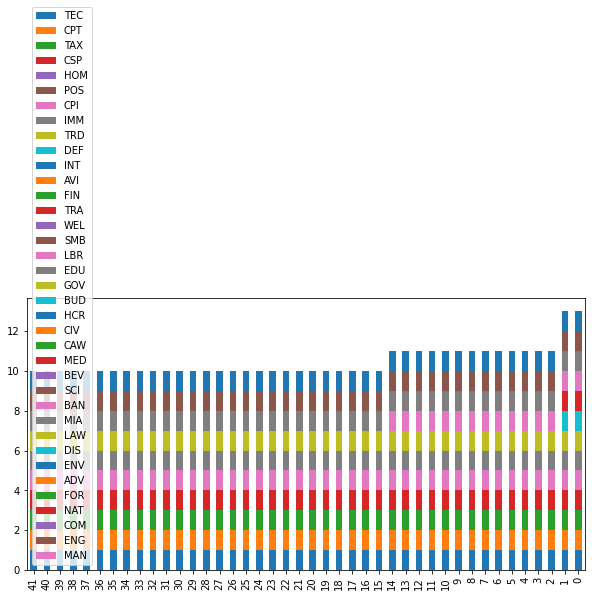

In [98]:
testplot6 = df_microsoft.sort_values(axis=0, by='season', ascending=True)
testplot6.iloc[:, 4:].plot.bar(y=df_apple.columns[4:], stacked=True, figsize=(10,5) )

In [99]:
df_microsoft.to_csv('c_microsoft.csv', index=False)